# Méthodes Numériques

In [1]:
import numpy as np
import matplotlib.pylab as plt

* On doit résoudre l'équation $$\frac{d^2x}{dt^2}+\omega^2x=0$$
* On peut l'identifier avec le schéma de la famille de Neumark avec $[M]=1$ , $[C]=0$ , $[K]=\omega^2$ , $[F]=0$. On peut de plus identifier le vecteur ${u(t)}$ avec $x$.
* On a par ailleurs les conditions initiales $x(0)=1.0$ , $\frac{dx}{dt}(0)=0$ , $T_{final}=10s$ , $\omega=2\pi$
* On retrouve aussi grace à l'équation de mouvement au temps initial : $a_0+\omega ^2x_0=0$ et donc $a_0=-\omega ^2$
* On fait les trois étapes du schéma de Neumark : prédiction, détérmination de l'accélération $\ddot x$ et enfin la correction.
* Prédiction :On effectue un changement de variable.  On impose $$\tilde u_{n+1} = u_n+\Delta t v_n + \frac{\Delta t^2}{2}(1-2\beta)a_n$$  $$\tilde v_{n+1} = v_n + \Delta t (1-\gamma)a_n$$
* Accélération : En prenant en compte les valeurs particulières de matrices $[M],[C],[K],[F]$ on retrouve :
$$ (1+\omega ^2 \Delta t^2\beta)a_{n+1}=-\omega ^2\tilde u_{n+1}$$
et donc $$a_{n+1}=-\frac{\omega ^2}{1+\omega ^2 \Delta t^2\beta}\tilde u_{n+1}$$
* Corréction : On revient à la variable de départ :
$$ u_{n+1}=\tilde u_{n+1}+\beta \Delta t^2 a_{n+1}$$
$$ v_{n+1}=\tilde v_{n+1}+\gamma \Delta t a_{n+1}$$
* Le schéma est toujours instable pour $\gamma < \frac{1}{2}$
* Le schéma est conditionellement stable si $\frac{1}{2} \leq \gamma$ et $2 \beta \leq \gamma$ . Dans notre cas, la condition de plus concerne le pas de temps : $\Delta t< \frac{1}{\omega}\frac{2}{\sqrt{2\gamma-4\beta}}$
* Le schéma est inconditionellement stable pour $\frac{1}{2} \leq \gamma \leq 2 \beta$

In [2]:
def oscillateur_newmark (beta,gamma,dt):
    w=2*np.pi
    x=[1]
    x_exct=[1]
    xp=[0]
    xpp=[-w*w]
    t=0
    T=10
    N=int(10/dt)
    tmp=np.arange(N+1)*dt
    #ut=utilde
    #vt=vtilde
    #a1=a_{n+1}
    #v1=v_{n+1}
    #u1=u_{n+1}
    #x=vecteur position
    #xp=vecteur vitesse
    #xpp=vecteur acceleration
    e=0
    for i in range (N):
        ut=x[i]+dt*xp[i]+dt*dt*0.5*(1-2*beta)*xpp[i]
        vt=xp[i]+dt*(1-gamma)*xpp[i]
        a1=-(w*w*ut)/(1+w*w*dt*dt*beta)
        u1=ut+beta*dt*dt*a1
        v1=vt+gamma*dt*a1
        x.append(u1)
        xp.append(v1)
        xpp.append(a1)
        x_exct.append(np.cos(w*tmp[i+1]))
        e1=abs(np.cos(w*tmp[i+1])-u1)
        if abs(e1)>e:
            e=abs(e1)
    
    return (x,x_exct,tmp,e)

### Première partie : Différences centrées
On prend $\gamma=\frac{1}{2}$ , $\beta=0$  
On commence par tracer les deux courbes pour $\Delta t=0.001$

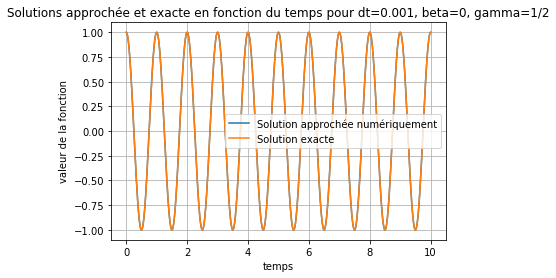

In [3]:
(x,x_exct,tmp,e1)=oscillateur_newmark (0,0.5,0.001)
plt.plot (tmp,x,label='Solution approchée numériquement')
plt.legend()
plt.plot (tmp,x_exct,label='Solution exacte')
plt.legend()
plt.ylabel("valeur de la fonction")
plt.grid()
plt.xlabel('temps')
plt.title('Solutions approchée et exacte en fonction du temps pour dt=0.001, beta=0, gamma=1/2')
plt.show()


* On remarque que les deux courbes sont confondues. Une hypothèse à cela est que le pas de temps est telement petit que l'erreur n'est pas visible, un calcul du vecteur euureur nous donnera cependant une erreur non nulle.
* On fait par la suite varier les valeurs de $\Delta t$ et trace les différents graphes pour chaque valeur du pas de temps. Dans toutes nos études on va prendre les valeurs suivantes pour $\Delta t $ : $\{0.0001,0.001,0.01,0.05,0.1,0.3,0.4,0.5,0.6\}$

/home/asus/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


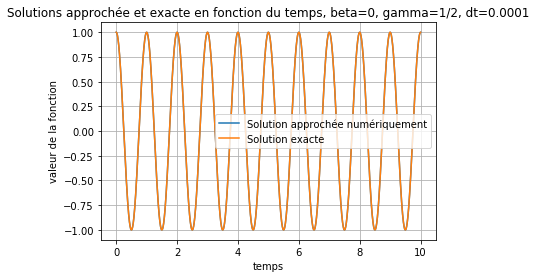

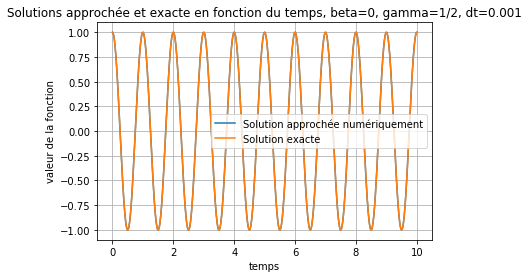

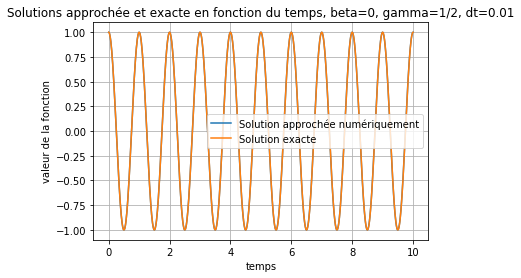

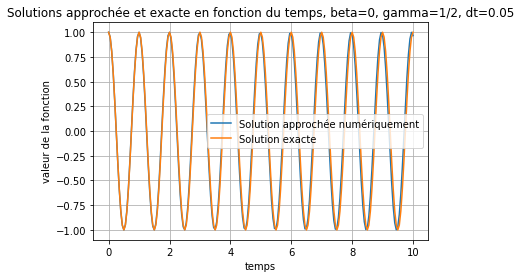

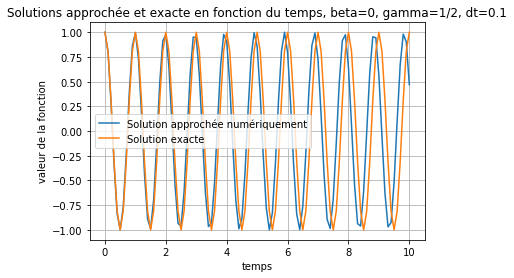

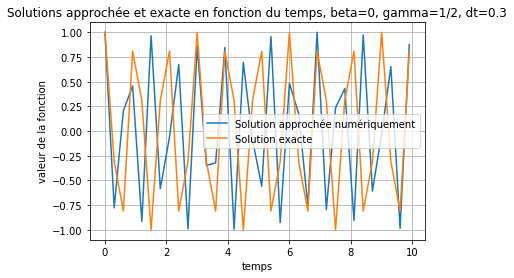

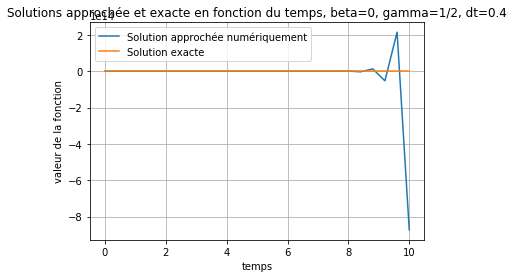

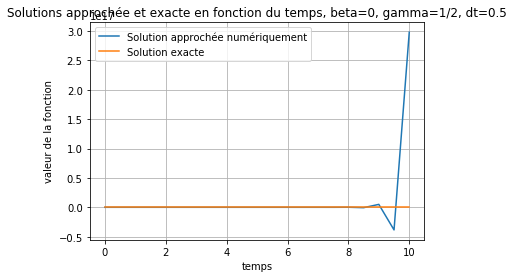

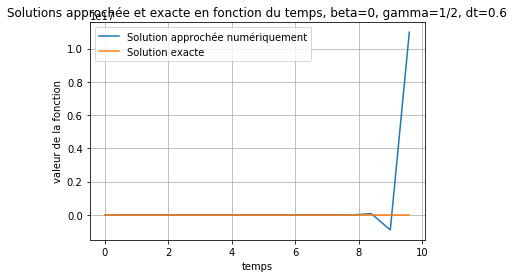

In [4]:
err1=[]
h1=[]
s=[0.1,1,10,50,100,300,400,500,600]
for i in range (len (s)):
    h=0.001*s[i]
    h1.append(h)
    (x,x_exct,tmp,e1)=oscillateur_newmark (0,0.5,h)
    plt.plot (tmp,x,label='Solution approchée numériquement')
    plt.legend()
    plt.plot (tmp,x_exct,label='Solution exacte')
    plt.legend()
    plt.ylabel("valeur de la fonction")
    plt.grid()
    plt.xlabel('temps')
    plt.title('Solutions approchée et exacte en fonction du temps, beta=0, gamma=1/2, dt=%s'%h)
    plt.show()
    err1.append(e1)




* On remarque que la solution approchée et la solution exacte se décalent l'une par rapport à l'autre à partir d'un pas de temps $\Delta t=0.1$. Le décalage est horizontal ( déphase ) pour des valeurs de $\Delta t $ assez petites. L'amplitude reste constante tant que le schéma est stable.
* On trace par la suite l'erreur en fonction du pas de temps.

Text(0.5, 1.0, 'erreur en fonction du pas de temps pour schéma differences centrées')

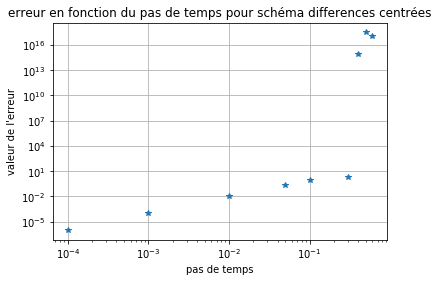

In [5]:
plt.loglog(h1,err1,'*')
plt.xlabel('pas de temps')
plt.grid()
plt.ylabel("valeur de l'erreur")
plt.title("erreur en fonction du pas de temps pour schéma differences centrées")

* On remarque que le schéma diverge à partir de valeurs supérieurs à 0.3s. On retrouve cette constatation visuelle grace à la théorie. En effet, la théorie précise que $\Delta t< \frac{1}{\omega}\frac{2}{\sqrt{2\gamma-4\beta}}$, avec $\gamma=\frac{1}{2}$ , $\beta=0$  
donc  $\Delta t< \frac{2}{\omega}$, $\omega=2\pi$
* On a donc la condition $\Delta t<0.318$ pour garantir la stabilité du schéma
* De plus, tant que le schéma est stable, il est d'ordre 2 ( d'apès le graphique ci dessus et le cours)

### Deuxième partie : Fox & Goodwin
On prend $\gamma=\frac{1}{2}$ , $\beta=\frac{1}{12}$

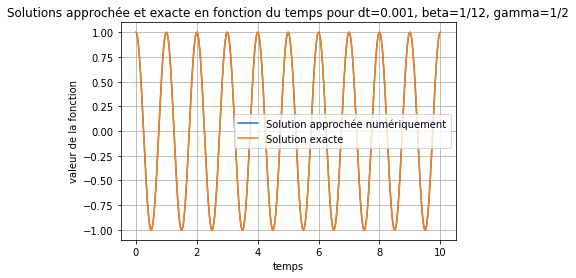

In [6]:
(x,x_exct,tmp,e2)=oscillateur_newmark (1/12,0.5,0.001)
plt.plot (tmp,x,label='Solution approchée numériquement')
plt.legend()
plt.plot (tmp,x_exct,label='Solution exacte')
plt.legend()
plt.ylabel("valeur de la fonction")
plt.xlabel('temps')
plt.grid()
plt.title('Solutions approchée et exacte en fonction du temps pour dt=0.001, beta=1/12, gamma=1/2')
plt.show()

* On remarque que les deux courbes sont confondues. Une explication à cela est que le pas de temps est tellement petit que l'erreur n'est pas visible, un calcul du vecteur erreur nous donnera cependant une erreur non nulle.

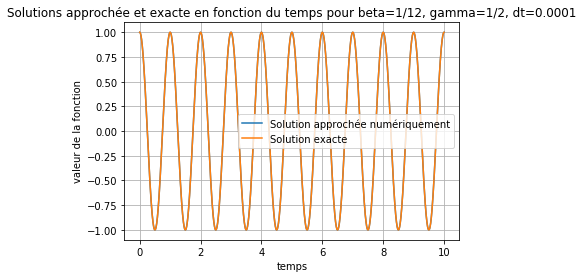

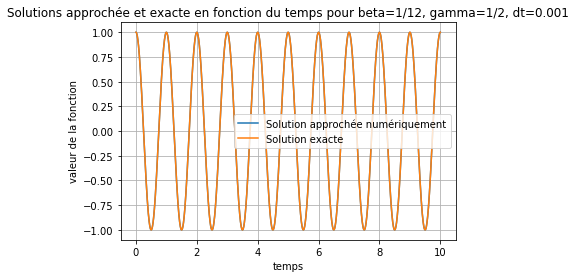

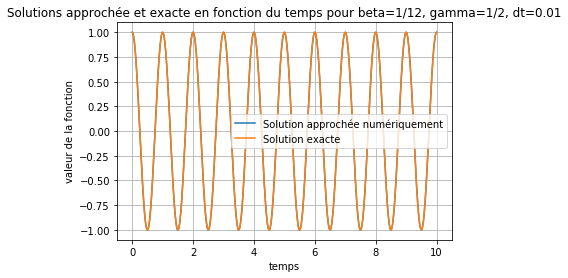

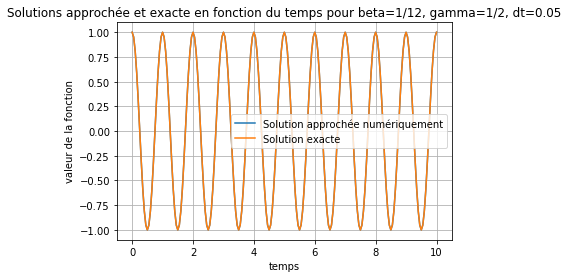

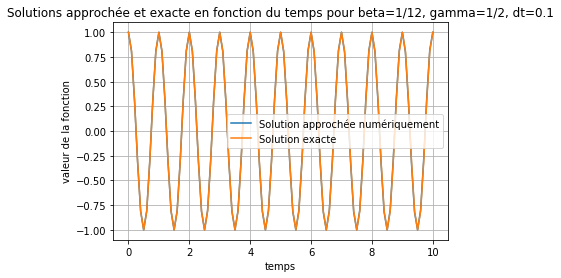

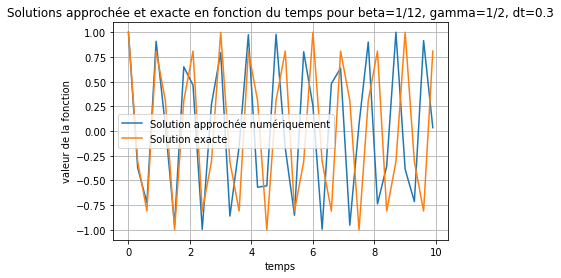

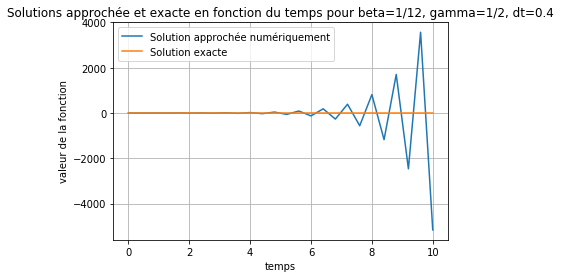

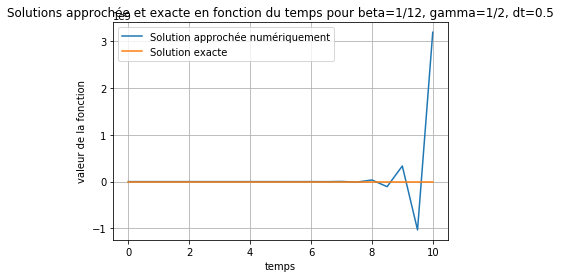

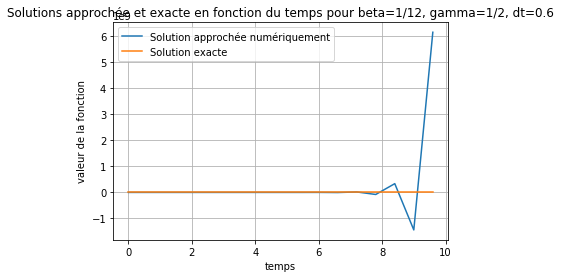

In [7]:
err2=[]
h2=[]
s=[0.1,1,10,50,100,300,400,500,600]
for i in range (len (s)):
    h=0.001*s[i]
    h2.append(h)
    (x,x_exct,tmp,e1)=oscillateur_newmark (1/12,0.5,h)
    plt.plot (tmp,x,label='Solution approchée numériquement')
    plt.legend()
    plt.plot (tmp,x_exct,label='Solution exacte')
    plt.legend()
    plt.ylabel("valeur de la fonction")
    plt.xlabel('temps')
    plt.grid()
    plt.title('Solutions approchée et exacte en fonction du temps pour beta=1/12, gamma=1/2, dt=%s'%h)
    plt.show()
    err2.append(e1)



* On remarque ici que pour des valeurs de t<0.3, l'impression visuelle montre une superposition exacte des deux courbes. Cette impression nous laisse penser que cette méthode semble plus précise que la méthode précedente.
* De plus, tant que le schéma est stable, il est d'ordre 2 ( d'apès le graphique ci dessus et le cours).

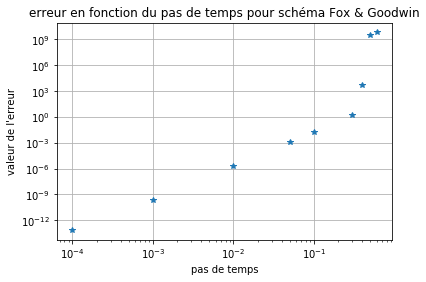

In [8]:
plt.loglog(h2,err2,'*')
plt.xlabel('pas de temps')
plt.ylabel("valeur de l'erreur")
plt.title("erreur en fonction du pas de temps pour schéma Fox & Goodwin")
plt.grid()

* On remarque que le schéma diverge à partir de valeurs supérieurs à 0.35s. On retrouve cette constatation visuelle grace à la théorie. En effet, la théorie précise que $\Delta t< \frac{1}{\omega}\frac{2}{\sqrt{2\gamma-4\beta}}$, avec $\gamma=\frac{1}{2}$ , $\beta=\frac{1}{12}$  
donc  $\Delta t< \frac{2}{\omega}$, $\omega=2\pi$
* On a donc la condition $\Delta t<0.389$ pour garantir la stabilité du schéma.
* Ce schéma, contrairement au prédent, est d'ordre 4, d'après la pente de 4 de la valeur de l'erreur en fonction du pas de temps.

### Troisième partie : accélération linéaire
On prend $\gamma=\frac{1}{2}$ , $\beta=\frac{1}{6}$

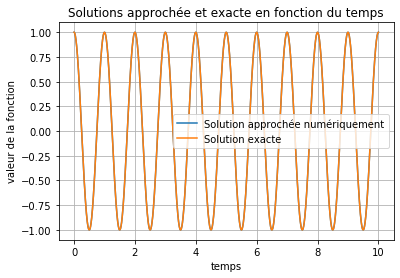

In [9]:
(x,x_exct,tmp,e1)=oscillateur_newmark (1/6,0.5,0.001)
plt.plot (tmp,x,label='Solution approchée numériquement')
plt.legend()
plt.plot (tmp,x_exct,label='Solution exacte')
plt.legend()
plt.ylabel("valeur de la fonction")
plt.xlabel('temps')
plt.title('Solutions approchée et exacte en fonction du temps')
plt.grid()
plt.show()

* On remarque que comme dans les deux cas précédents, les deux courbes sont confondues. 
* On prends par la suite une valeur de $\Delta t$ 100 fois plus grande ($dt=0.1$)

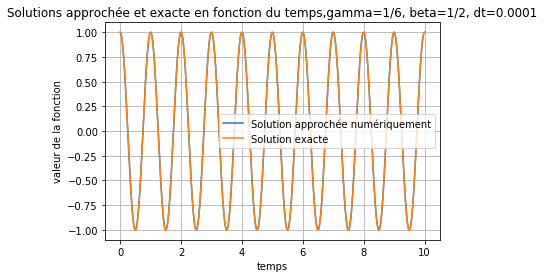

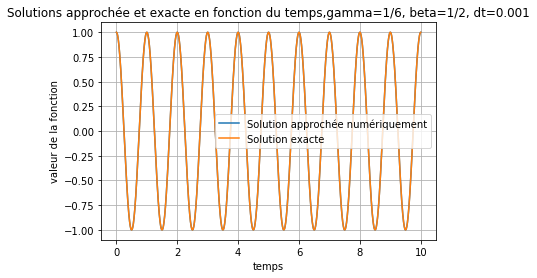

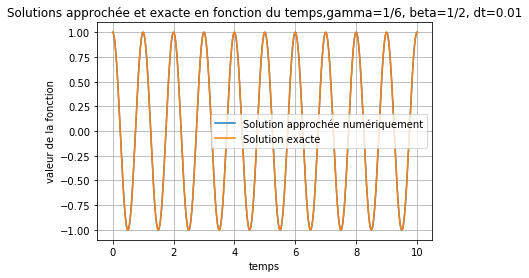

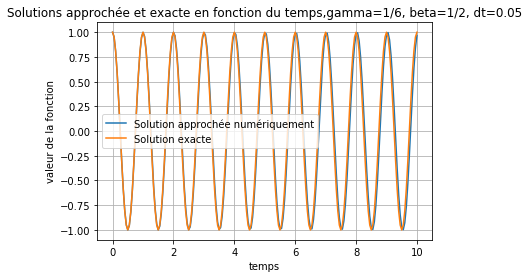

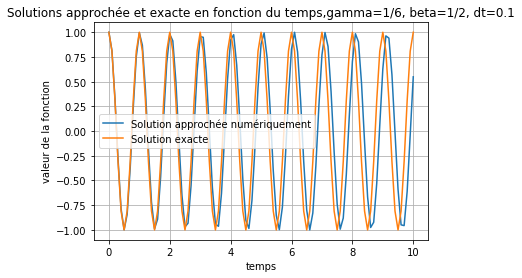

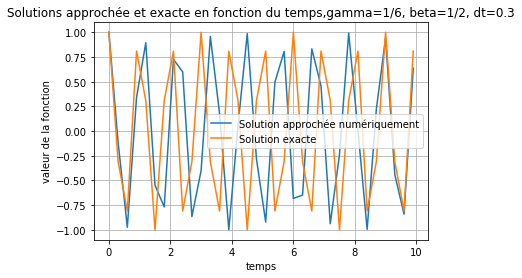

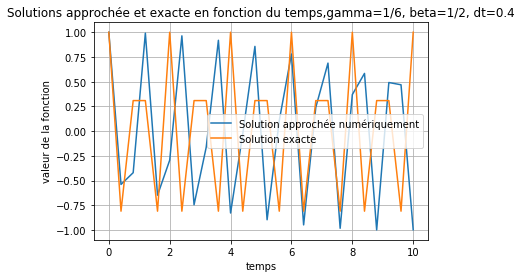

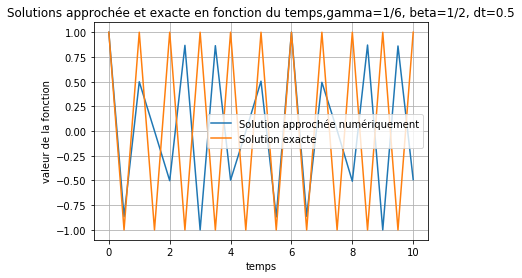

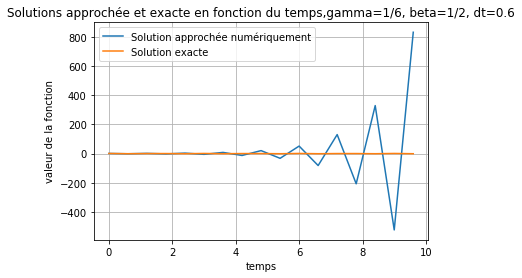

In [10]:
err3=[]
h3=[]
s=[0.1,1,10,50,100,300,400,500,600]
for i in range (len (s)):
    h=0.001*s[i]
    h3.append(h)
    (x,x_exct,tmp,e1)=oscillateur_newmark (1/6,0.5,h)
    plt.plot (tmp,x,label='Solution approchée numériquement')
    plt.legend()
    plt.plot (tmp,x_exct,label='Solution exacte')
    plt.legend()
    plt.ylabel("valeur de la fonction")
    plt.xlabel('temps')
    plt.grid()
    plt.title('Solutions approchée et exacte en fonction du temps,gamma=1/6, beta=1/2, dt=%s'%h)
    plt.show()
    err3.append(e1)


* Pour des valeurs de $\Delta t < 0.1 s$, les courbes semblent superposées, l"aaproximation nous semble donc assez bonne.
* Pour une valeur du pas de temps de 0.1s, on remarque ici aussi un décalage de la solution approchée par rapport à la solution exacte. Le schéma reste cependant stable jusqu'à $t=0.5s$ puis devient instable pour $t=0.6s$
* Le décalage est faible comparé aux premier cas ($\gamma=\frac{1}{2}$ , $\beta=0$).
* On remarque de plus que l'amplitude reste inchangée tant que le pas de temps permet la stabilité.

Text(0.5, 1.0, 'erreur en fonction du pas de temps pour schéma accélération linéaire')

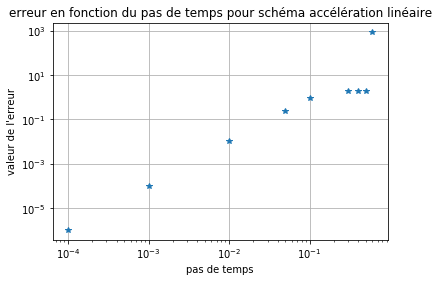

In [11]:

plt.loglog(h3,err3,'*')
plt.xlabel('pas de temps')
plt.ylabel("valeur de l'erreur")
plt.grid()
plt.title("erreur en fonction du pas de temps pour schéma accélération linéaire")

* On remarque que le schéma diverge à partir de valeurs supérieurs à 0.35s. On retrouve cette constatation visuelle grace à la théorie. En effet, la théorie précise que $\Delta t< \frac{1}{\omega}\frac{2}{\sqrt{2\gamma-4\beta}}$, avec $\gamma=\frac{1}{2}$ , $\beta=\frac{1}{6}$  
donc  $\Delta t< \frac{2}{\omega}$, $\omega=2\pi$
* On a donc la condition $\Delta t<0.551$ pour garantir la stabilité du schéma.
* Ce schéma est lui aussi d'ordre 2.

### Quatrième partie : accélération moyenne
On prend $\gamma=\frac{1}{2}$ , $\beta={1}{4}$

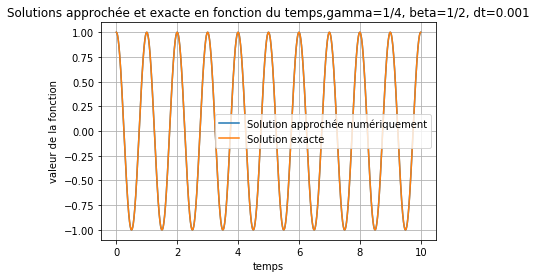

In [12]:
(x,x_exct,tmp,e1)=oscillateur_newmark (1/4,0.5,0.001)
plt.plot (tmp,x,label='Solution approchée numériquement')
plt.legend()
plt.plot (tmp,x_exct,label='Solution exacte')
plt.legend()
plt.ylabel("valeur de la fonction")
plt.xlabel('temps')
plt.grid()
plt.title('Solutions approchée et exacte en fonction du temps,gamma=1/4, beta=1/2, dt=0.001')
plt.show()

* Ici encore, On a une superposition des deux courbes.
* On retrace avec $\Delta t$ variable.

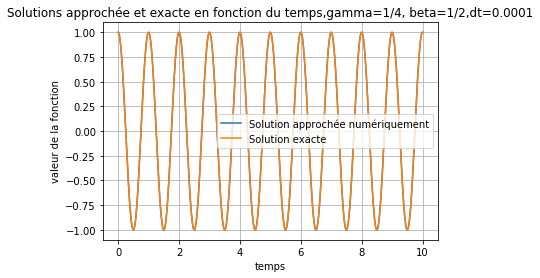

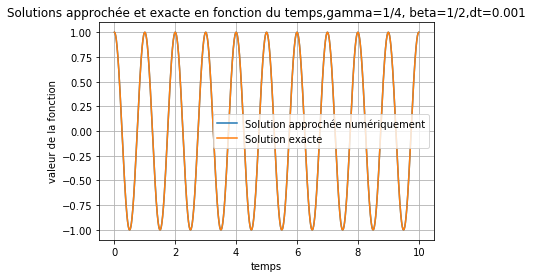

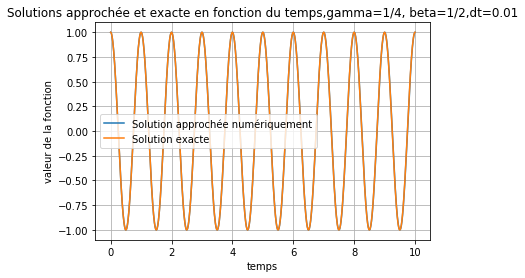

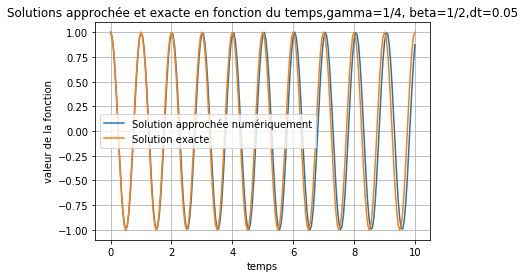

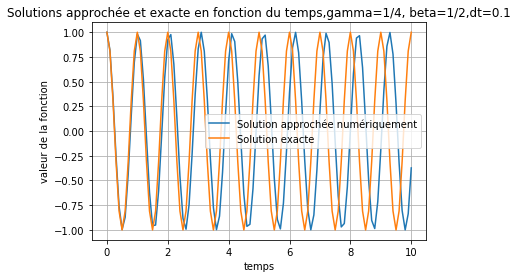

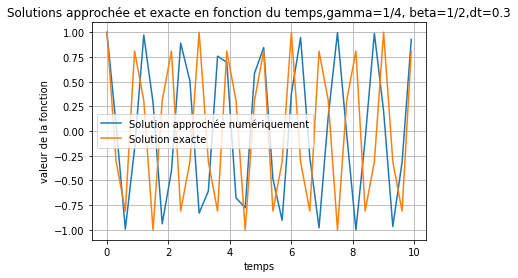

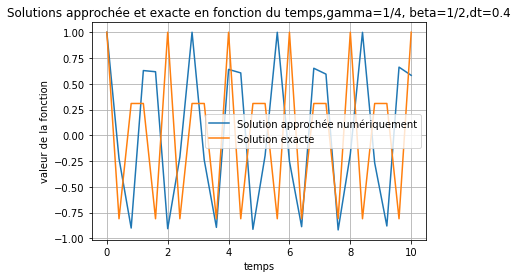

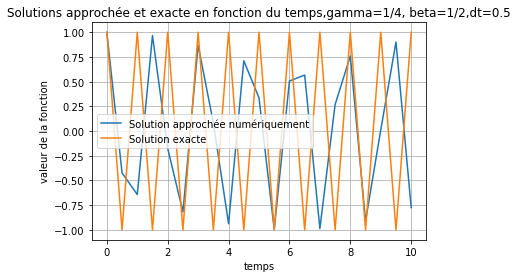

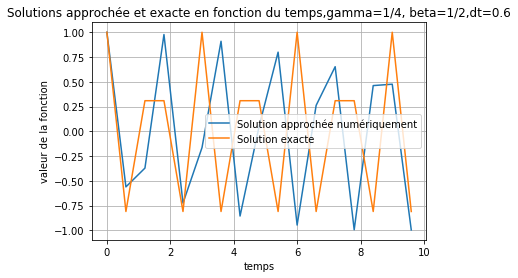

In [13]:
err4=[]
h4=[]
s=[0.1,1,10,50,100,300,400,500,600]
for i in range (len (s)):
    h=0.001*s[i]
    h4.append(h)
    (x,x_exct,tmp,e1)=oscillateur_newmark (1/4,0.5,h)
    plt.plot (tmp,x,label='Solution approchée numériquement')
    plt.legend()
    plt.plot (tmp,x_exct,label='Solution exacte')
    plt.legend()
    plt.ylabel("valeur de la fonction")
    plt.xlabel('temps')
    plt.title('Solutions approchée et exacte en fonction du temps,gamma=1/4, beta=1/2,dt=%s'%h)
    plt.grid()
    plt.show()
    err4.append(e1)



* On observe un déphasage petit pour $0<\Delta t < 0.1s$, puis le déphasage augmente de plus en plus. L'amplitude est ici aussi inchangée entre la solution approchée et la solution analytique.

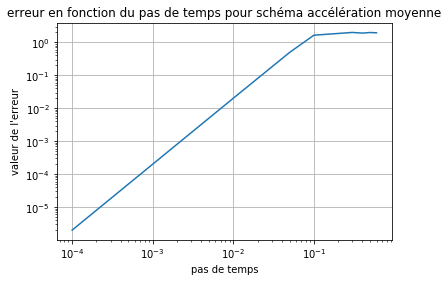

In [14]:
plt.loglog(h4,err4)
plt.xlabel('pas de temps')
plt.ylabel("valeur de l'erreur")
plt.title("erreur en fonction du pas de temps pour schéma accélération moyenne")
plt.grid()

* Contrairement aux autres courbes d'erreurs, cette courbe se stabilise à partir d'une certaine valeur du pas de temps. Ceci montre la stabilité su schéma et conforte les résultats théoriques vus en cours.
* Ici encore, tant que le schéma est stable, il est d'ordre 2 ( d'apès le graphique ci dessus et le cours)

### Cinquième partie : implémentation avec une méthode de Runge-Kutta:
* Ayant déjà implémenté cette méthode dans le TP précédent, on remet le code du TP3 en y ajoutant quelques modifications.

Text(0.5, 1.0, "Tracé de la solution approchée à l'aide de Runge Kutta-2 pour un pas de temps de 0.001s")

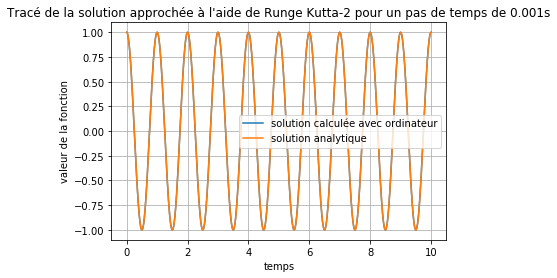

In [15]:
def pas_rk2 (h,tn,Yn):
    A=np.array(([0,1],[-w**2,0]))
    I=np.array(([1,0],[0,1]))
    A2=np.dot(A,A)
    tot=I+h*A+0.5*h*h*A2
    
    return np.dot(Yn ,tot)
def runge_kutta_2 (h,T,Yi):
    t=0
    time=[]
    yt=[]
    y=Yi
    x_exact=[]
    e=0
    while t<T:
        x_exact.append(np.cos(w*t))
        yt.append(y)
        y=pas_rk2(h,t,y)
        time.append(t)
        t=t+h
        

    y_appr=np.array(yt)
    
    return(y_appr,np.array(time),x_exact)

T=10
w=2*np.pi
h=1.e-3
Yi=[1,0]


[sol,temps,x_exact]= runge_kutta_2 (h,T,Yi)
plt.plot(temps,sol[:,0],label='solution calculée avec ordinateur')
plt.legend()
plt.plot(temps,x_exact,label='solution analytique')
plt.legend()
plt.ylabel('valeur de la fonction')
plt.xlabel('temps')
plt.grid()
plt.title("Tracé de la solution approchée à l'aide de Runge Kutta-2 pour un pas de temps de 0.001s")

* Encore une fois, les deux graphiques sont supérposés

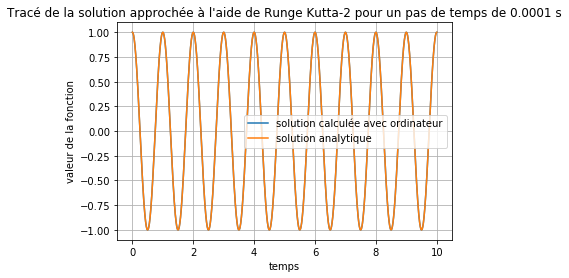

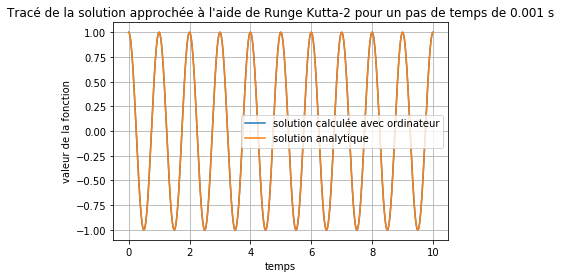

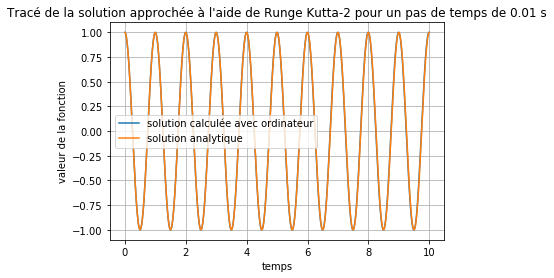

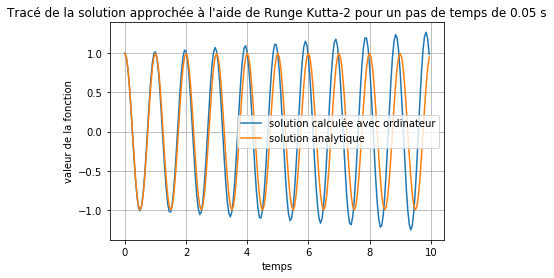

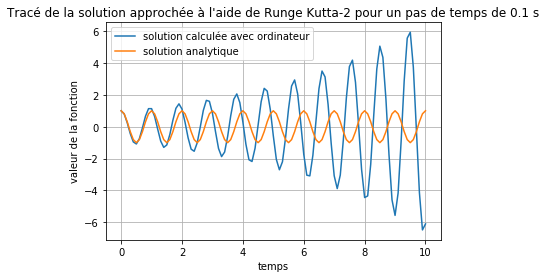

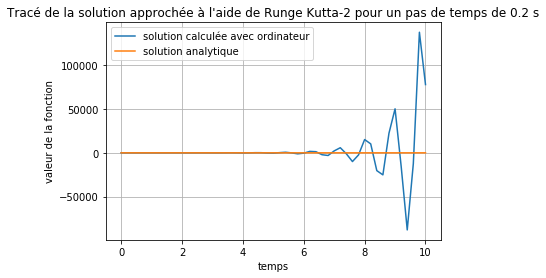

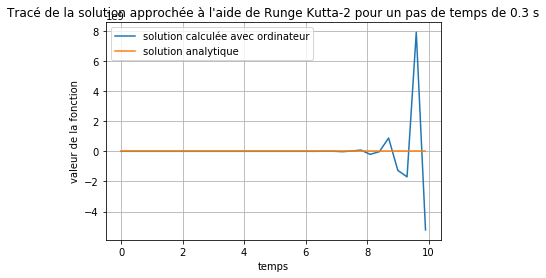

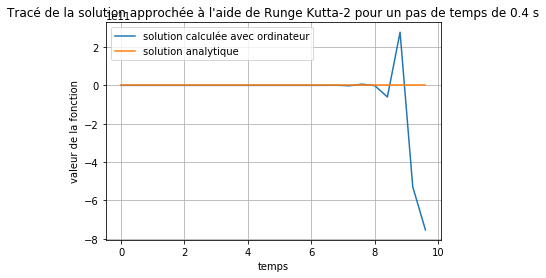

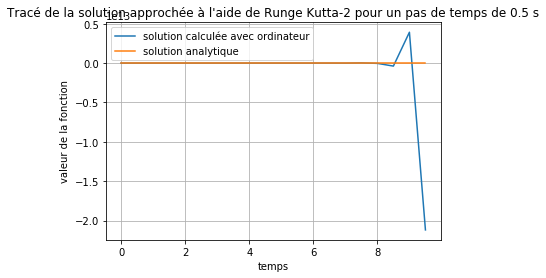

In [16]:
s=[0.0001,0.001,0.01,0.050,0.100,0.200,0.300,0.400,0.500,0.700]
for i in range (len(s)-1):
    [sol,temps,x_exact]= runge_kutta_2 (s[i],10,Yi)
    plt.plot(temps,sol[:,0],label='solution calculée avec ordinateur')
    plt.legend()
    plt.plot(temps,x_exact,label='solution analytique')
    plt.legend()
    plt.ylabel('valeur de la fonction')
    plt.xlabel('temps')
    plt.title("Tracé de la solution approchée à l'aide de Runge Kutta-2 pour un pas de temps de %s s"%s[i])
    plt.grid()
    plt.show()

* On observe, contrairement aux schémas précédents, un changement d'amplitude qui accompagne le déphasage. Ce changement d'amplitude est conséquent à partir de $\Delta t=0.1s$

Text(0.5, 1.0, 'tracé des erreurs pour differents pas de temps differents avec RK2 (échelle log-log)')

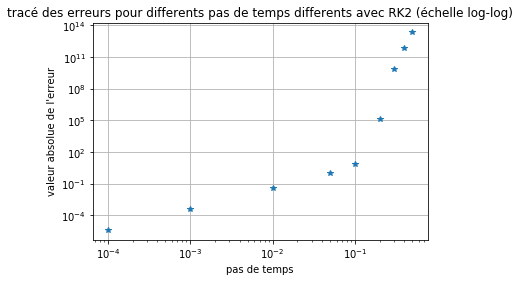

In [17]:
def sole (h,T):
    solution_exacte=[]
    
    t=0
    while t<T:
        a=np.cos(2*np.pi*t)
        solution_exacte.append(a)
        t+=h
    
    return solution_exacte
def erreur_rk2 (Yi,T,h):
    solution_exacte1=sole (h,T)

    [sol1,temps1,exct]=runge_kutta_2 (h,T,Yi)

    erreur2=(sol1[:,0]-solution_exacte1)
    return max(abs(erreur2))

ev4=[]
s=[0.0001,0.001,0.01,0.050,0.100,0.200,0.300,0.400,0.500,0.700]
s4=[]
for p in range (len(s)-1):
    
    e4=erreur_rk2(Yi,10,s[p])
    ev4.append(e4)
    s4.append(s[p])
    
ev4=np.array(ev4)
#ev4=ev4[:,0]
plt.plot (s4,ev4,'*')
plt.xscale('log')
plt.yscale('log')
plt.ylabel("valeur absolue de l'erreur")
plt.xlabel('pas de temps')
plt.grid()
plt.title("tracé des erreurs pour differents pas de temps differents avec RK2 (échelle log-log)")

* On voit que le schéma de Runge Kutta 2 n'est lui non plus pas stable à partir d'une certaine valeur de $\Delta t$. Ce schéma est don conditionellement stable.
* On peut retrouver cette valeur théoriquement (d'après le cours) : 
$\Delta t \le \frac {2}{\omega ^2}$
* Pour être stable dans ce schéma de Runge Kutta 2, il faut donc que $\Delta t <0.05$
* On remarque que ce schéma est d'ordre 2.

Text(0.5, 1.0, 'erreurs pour différents schémas en fontion du pas de temps')

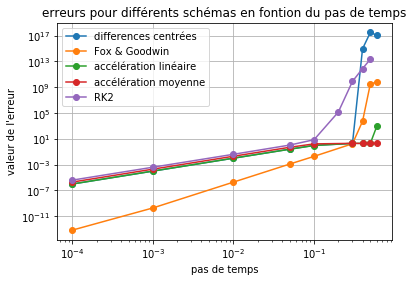

In [18]:
plt.loglog(h1,err1,'-o',label='differences centrées')
plt.legend()
plt.loglog(h2,err2,'-o',label='Fox & Goodwin')
plt.legend()
plt.loglog(h3,err3,'-o',label='accélération linéaire')
plt.legend()
plt.loglog(h4,err4,'-o',label='accélération moyenne')
plt.legend()
plt.loglog (s4,ev4,'-o',label='RK2')
plt.legend()
plt.xlabel('pas de temps')
plt.ylabel("valeur de l'erreur")
plt.grid()
plt.title("erreurs pour différents schémas en fontion du pas de temps")

* On retrouve, en mettant les erreurs des cinq schéma ensemble, certains résultas théoriquement prouvés.
* Premièrement, l'impression visuelle donnant le schéma de Fox & Goodwin s'est avérée juste, l'erreur est plus faible (tant qu'il est stable) par rapport aux autres schémas. Ce résultat est aussi prouvé analytiquement ( erreur sur la mesure d'une période pour le schéma Fox & Goodwin est de $O(\Delta t^3)$.
* De plus, on remarque que la courbe donnant l'erreur en différences finies et celle donnant l'erreur en accélération linéaire sont supérposées. Ceci est aussi vérifié par la théorie ( erreur en valeur absolue pour les deux schémas est la même ( $\frac{\omega^2\Delta t^2}{24})$).
* D'autre part, l'erreur en accélération moyenne est un peu plus grande que celle en différences centrées. On peut prouver que l'erreur en accélération moyenne vaut le double de celle en accélération linéaire.
* Finallement, le comporte général des courbes nous permet de retrouver la stabilité inconditionelle du schéma de l'accélération moyenne ainsi que l'ordre des schémas ( tous d'ordre 2 sauf Fox & Goodwin qui est d'ordre 4).